In [1]:
%matplotlib inline
import subprocess
import time
import cv2
import os
import matplotlib.pyplot as plt
from import_me import *

In [2]:
with open("../BPSK - Sem Correlate/red_dot.bmp", "rb") as f:
    _ = f.read()
orig = np.frombuffer(_, dtype = np.uint8)

img_orig = orig[122:]
img_orig = np.flipud(cv2.cvtColor(img_orig.reshape((256, 256, 3)), cv2.COLOR_BGR2RGB)).ravel()

In [3]:
header = orig[:122]

In [4]:
%%time
lst_imgs = []
for i in range(15):
    x = 0.0
    print("Simulando para Noise: ", x, "Delay: ", i)
    
    process=subprocess.Popen(["python2", "top_block.py", "--noise", str(x), "--delay", str(i)],
                         stdin=subprocess.PIPE,
                         stdout=subprocess.PIPE,
                         stderr=subprocess.PIPE)


    time.sleep(20)

    # while os.stat("output.data").st_size < os.stat("orig_pinguim.bmp").st_size * 2:
    #     pass

    inputdata= " "
    stdoutdata,stderrdata=process.communicate(input=inputdata)
    
    if os.stat("output.data").st_size != os.stat("../BPSK - Sem Correlate/red_dot.bmp").st_size * 2:
        print("Não teve tempo suficiente para o valor: {}!!! ERRO!".format(x))
        break
        
    print("Fazendo Correlate...")
        
    img = readOutput("output.data", np.array([67, 255], dtype = np.uint8), header, (256, 256))
    lst_imgs.append(img)
    print("*--------------------------------------------------------------*")
#     print("*--------------------------------------------------------------*")

('Simulando para Noise: ', 0.0, 'Delay: ', 0)
Fazendo Correlate...
*--------------------------------------------------------------*
('Simulando para Noise: ', 0.0, 'Delay: ', 1)
Fazendo Correlate...
*--------------------------------------------------------------*
('Simulando para Noise: ', 0.0, 'Delay: ', 2)
Fazendo Correlate...
*--------------------------------------------------------------*
('Simulando para Noise: ', 0.0, 'Delay: ', 3)
Fazendo Correlate...
*--------------------------------------------------------------*
('Simulando para Noise: ', 0.0, 'Delay: ', 4)
Fazendo Correlate...
*--------------------------------------------------------------*
('Simulando para Noise: ', 0.0, 'Delay: ', 5)
Fazendo Correlate...
*--------------------------------------------------------------*
('Simulando para Noise: ', 0.0, 'Delay: ', 6)
Fazendo Correlate...
*--------------------------------------------------------------*
('Simulando para Noise: ', 0.0, 'Delay: ', 7)
Fazendo Correlate...
*--------

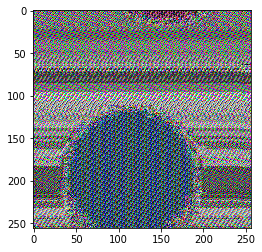

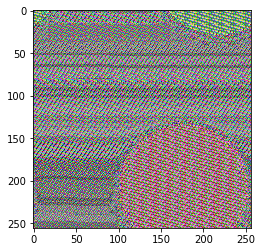

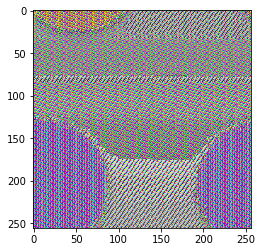

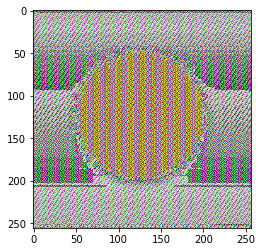

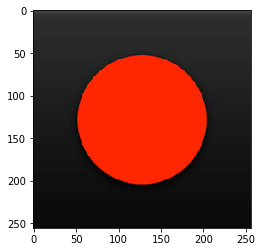

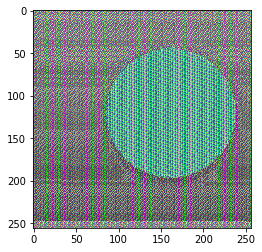

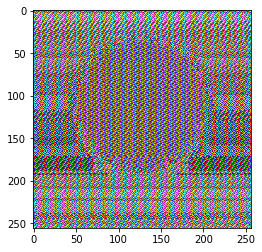

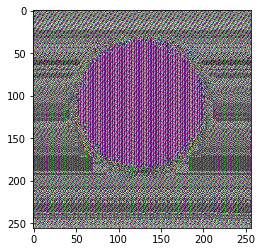

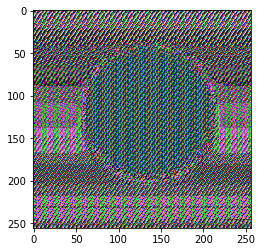

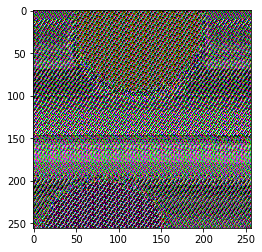

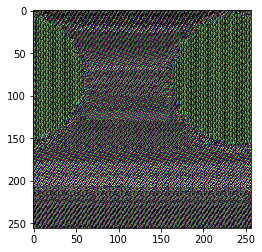

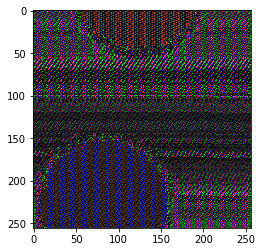

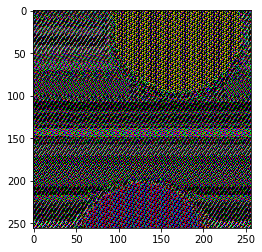

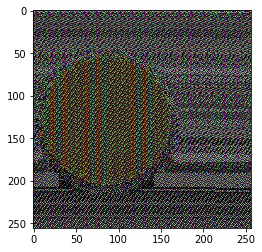

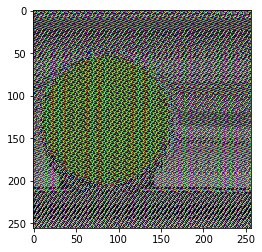

In [6]:
for img in lst_imgs:
    plt.imshow(img)
    plt.show()

In [8]:
%%time
lst_imgs2 = []
for i in range(5):
    x = 0.7
    print("Simulando para Noise: ", x, "Delay: ", i)
    
    process=subprocess.Popen(["python2", "top_block.py", "--noise", str(x), "--delay", str(i)],
                         stdin=subprocess.PIPE,
                         stdout=subprocess.PIPE,
                         stderr=subprocess.PIPE)


    time.sleep(20)

    # while os.stat("output.data").st_size < os.stat("orig_pinguim.bmp").st_size * 2:
    #     pass

    inputdata= " "
    stdoutdata,stderrdata=process.communicate(input=inputdata)
    
    if os.stat("output.data").st_size != os.stat("../BPSK - Sem Correlate/red_dot.bmp").st_size * 2:
        print("Não teve tempo suficiente para o valor: {}!!! ERRO!".format(x))
        break
        
    print("Fazendo Correlate...")
        
    img = readOutput("output.data", np.array([67, 255], dtype = np.uint8), header, (256, 256))
    lst_imgs2.append(img)
    print("*--------------------------------------------------------------*")
#     print("*--------------------------------------------------------------*")

('Simulando para Noise: ', 0.7, 'Delay: ', 0)
Fazendo Correlate...
*--------------------------------------------------------------*
('Simulando para Noise: ', 0.7, 'Delay: ', 1)
Fazendo Correlate...
*--------------------------------------------------------------*
('Simulando para Noise: ', 0.7, 'Delay: ', 2)
Fazendo Correlate...
*--------------------------------------------------------------*
('Simulando para Noise: ', 0.7, 'Delay: ', 3)
Fazendo Correlate...
*--------------------------------------------------------------*
('Simulando para Noise: ', 0.7, 'Delay: ', 4)
Fazendo Correlate...
*--------------------------------------------------------------*
CPU times: user 23.2 s, sys: 166 ms, total: 23.4 s
Wall time: 2min 3s


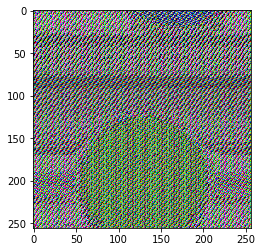

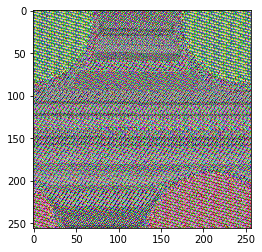

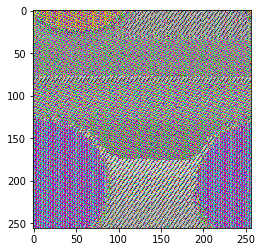

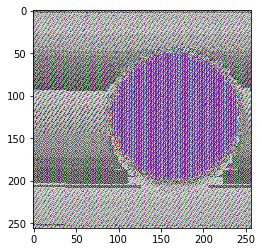

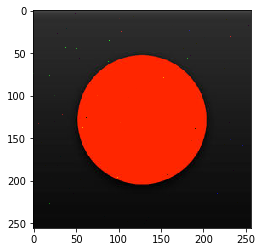

In [9]:
for img in lst_imgs2:
    plt.imshow(img)
    plt.show()